# Load Data from Weights & Biases

In [1]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=0d19ee6418f342482e04f7facdc5a233e1e3838c374e035d609d69cec5a81bfd
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [2]:
import wandb
wandb.login(relogin = True)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
run = wandb.init()
datas = run.use_artifact('msds_498_claims_modeling/claims_modeling/sythetic_data:v5')
directory = datas.download(root = 'datasets')

wandb: Currently logged in as: tylerrosacker2022 (msds_498_claims_modeling). Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact sythetic_data:v5, 153.76MB. 3 files... 
wandb:   3 of 3 files downloaded.  
Done. 0:0:2.3


# Start Real Notebook

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

targets = ['vehicle_claim_cnt_pd_0']
vars = ['vehicle_age', 'annual_mileage', 'vehicle_type', 'max_driver_age', 'min_driver_age', 'mean_driver_age', 'min_driver_tenure', 'youthful_driver_count', 'credit_score', 'garaging_location', 'household_tenure',
        'multiline_houses', 'multiline_personal_article_policy', 'multiline_personal_liability_umbrella', 'multiline_rental', 'vehicle_count',
        'household_claim_time_since_all', 'household_claim_time_since_bi', 'household_claim_time_since_pd', 'household_claim_time_since_comp',
        'household_claim_time_since_coll', 'household_claim_time_since_mpc', 'household_claim_time_since_ers', 'household_claim_time_since_ubi'
      ]

df = pd.read_parquet('./datasets/split=train')

In [5]:
len(df.index)

220383

## Distribution of Each Predictor


Variable: vehicle_age


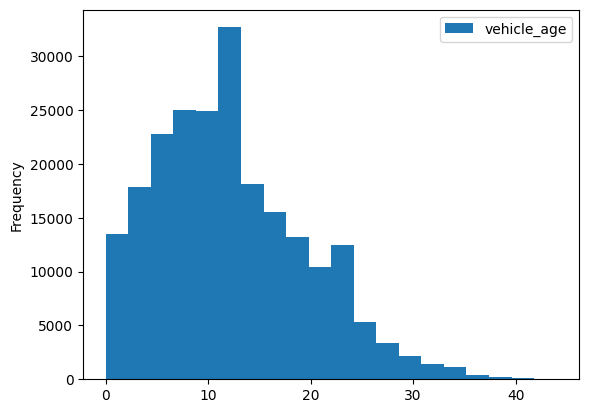


Variable: annual_mileage


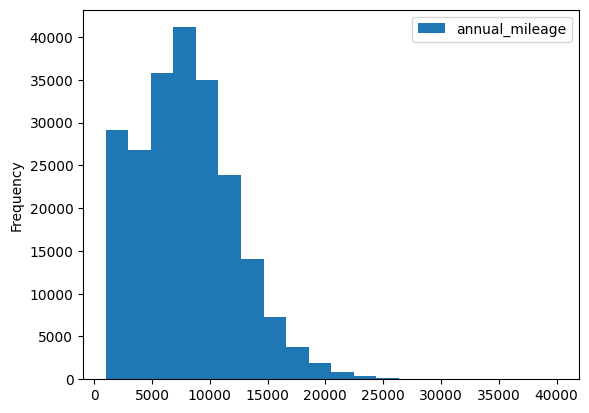


Variable: vehicle_type


,count
vehicle_type,
pickup,23689
sedan,52347
sports car,46753
suv,34894
van,62700



Variable: max_driver_age


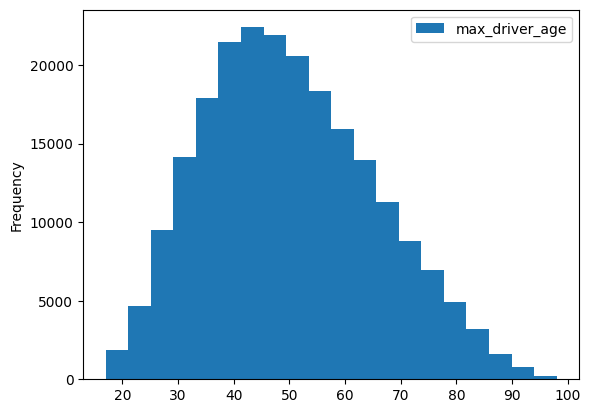


Variable: min_driver_age


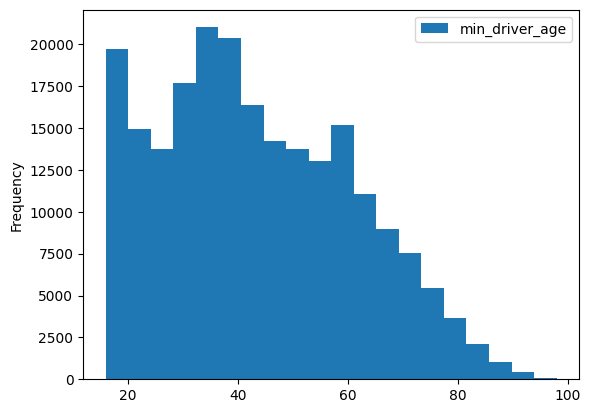


Variable: mean_driver_age


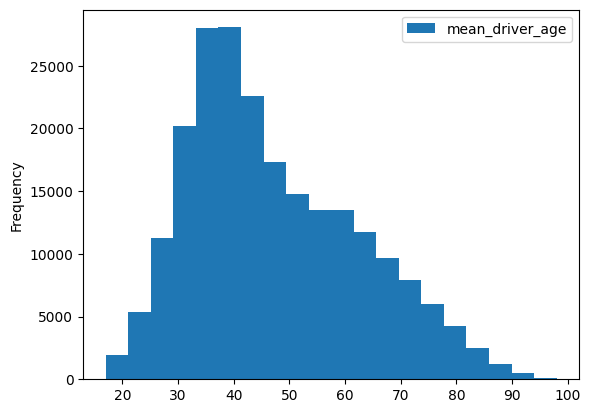


Variable: min_driver_tenure


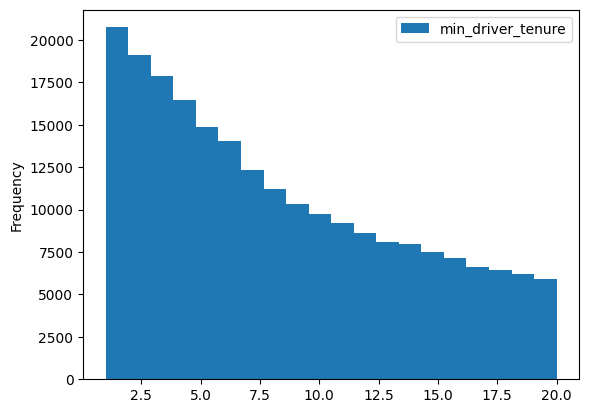


Variable: youthful_driver_count


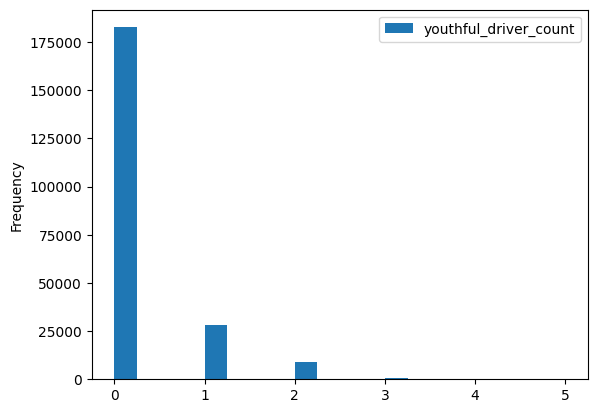


Variable: credit_score


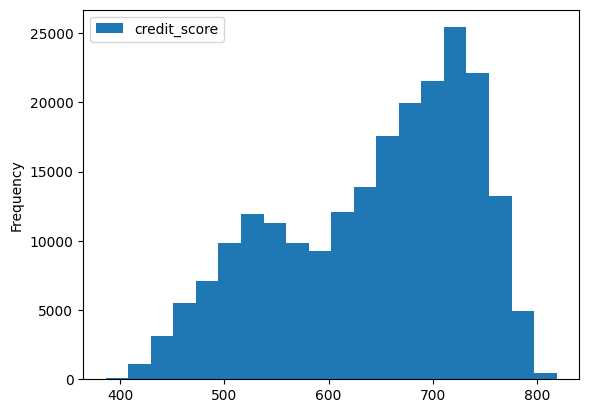


Variable: garaging_location


,count
garaging_location,
country,24990
downtown,136711
suburb,58682



Variable: household_tenure


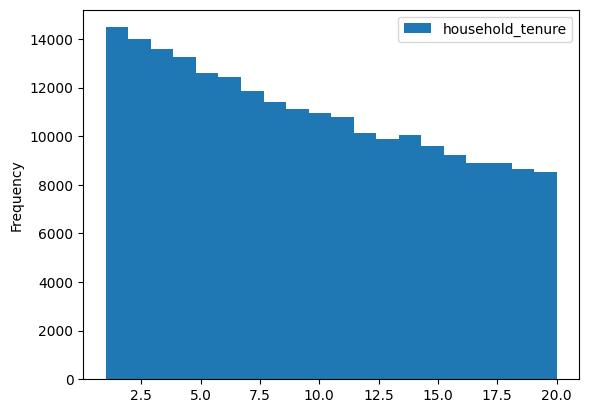


Variable: multiline_houses


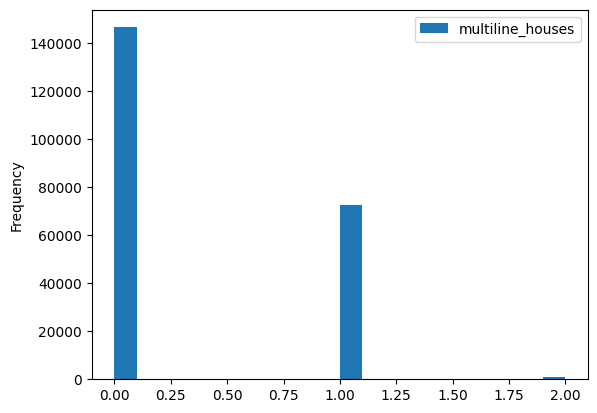


Variable: multiline_personal_article_policy


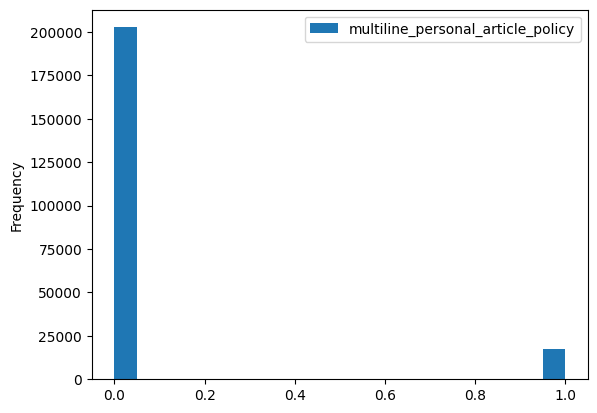


Variable: multiline_personal_liability_umbrella


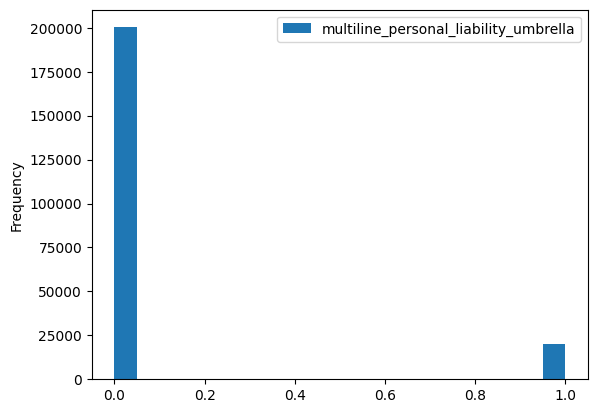


Variable: multiline_rental


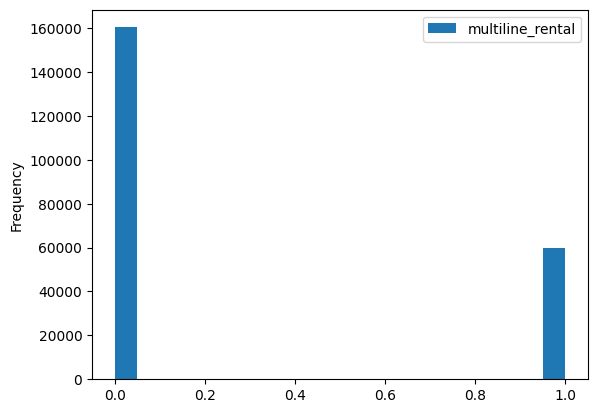


Variable: vehicle_count


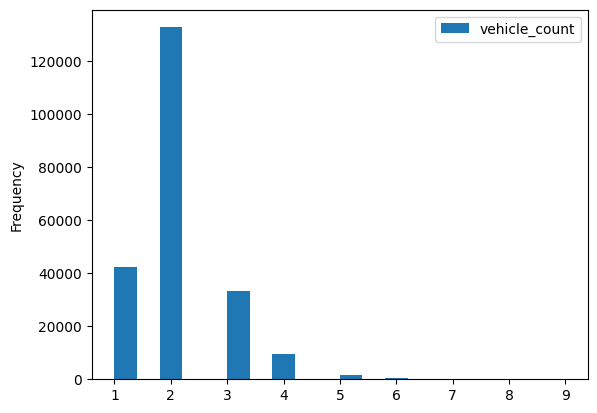


Variable: household_claim_time_since_all


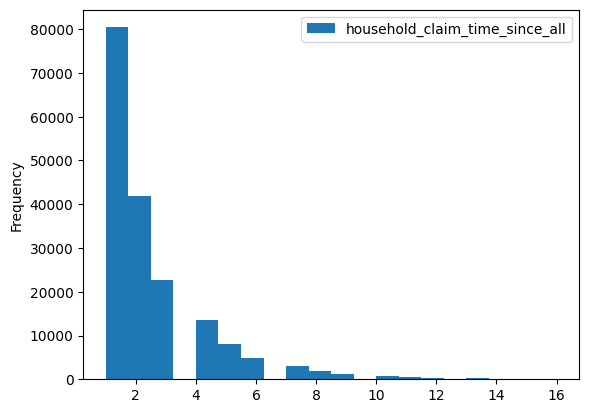


Variable: household_claim_time_since_bi


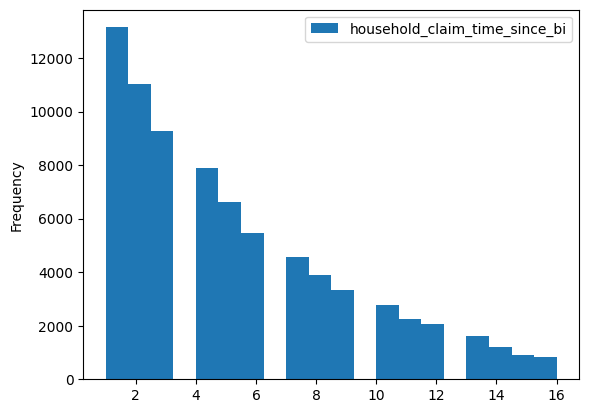


Variable: household_claim_time_since_pd


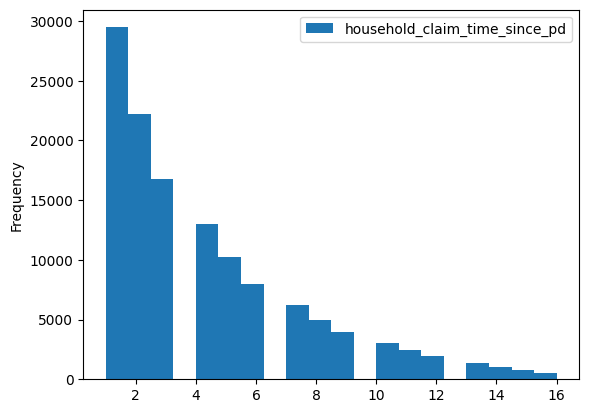


Variable: household_claim_time_since_comp


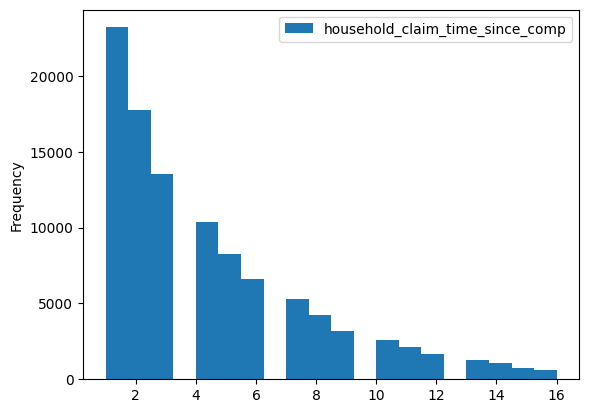


Variable: household_claim_time_since_coll


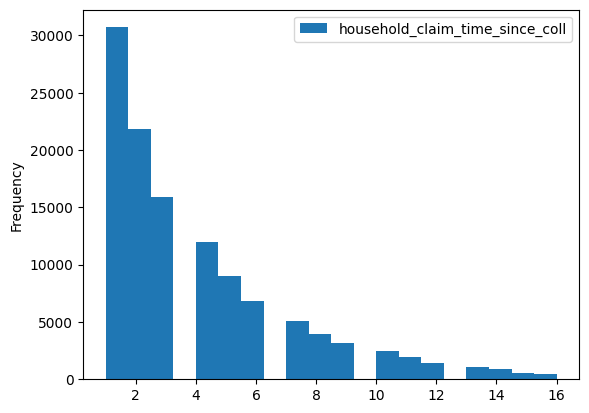


Variable: household_claim_time_since_mpc


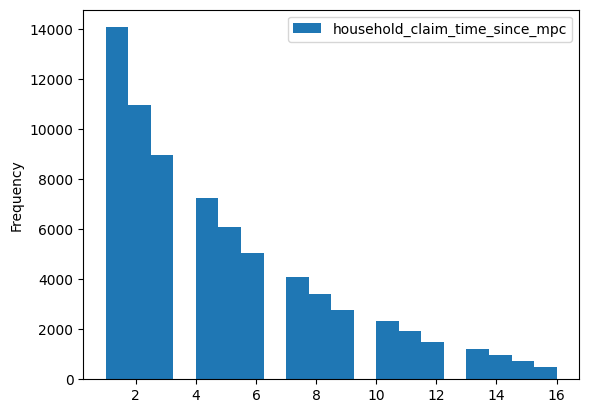


Variable: household_claim_time_since_ers


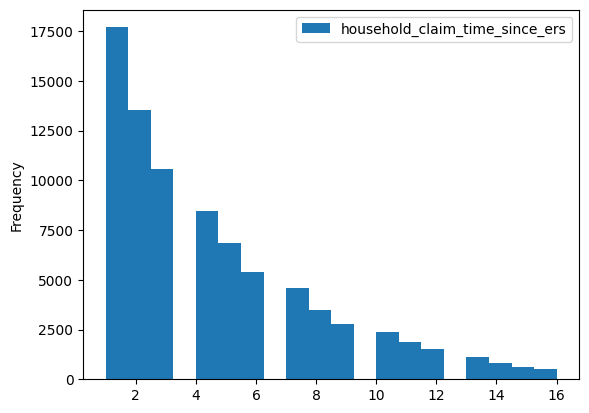


Variable: household_claim_time_since_ubi


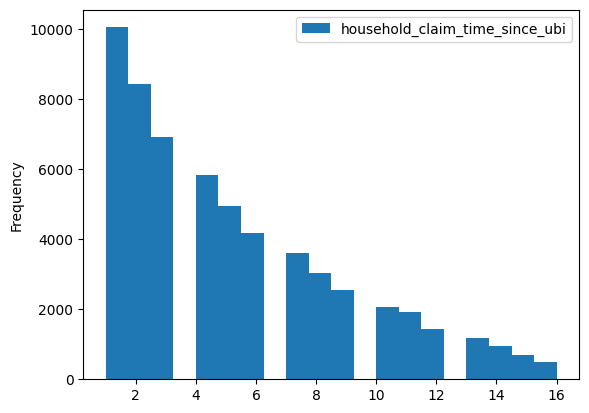

In [6]:
for var in vars:
  print(f"\nVariable: {var}")

  if df[var].dtype == 'O':
    temp = df[[var]].assign(count = 1).groupby(var).count()
    display(temp)
    
  else:
    df \
        [[var]] \
        .plot.hist(bins = 20);

  plt.pause(0.01);

## One Way Predictive Power

Target: vehicle_claim_cnt_pd_0

Variable: vehicle_age


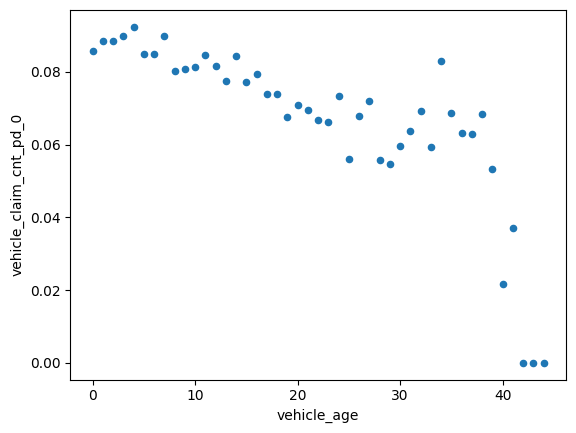


Variable: annual_mileage


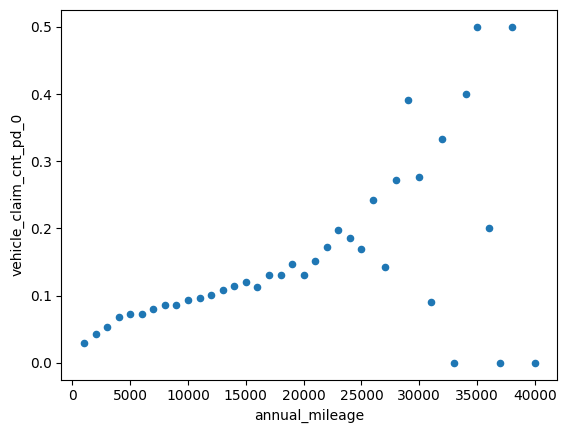


Variable: vehicle_type


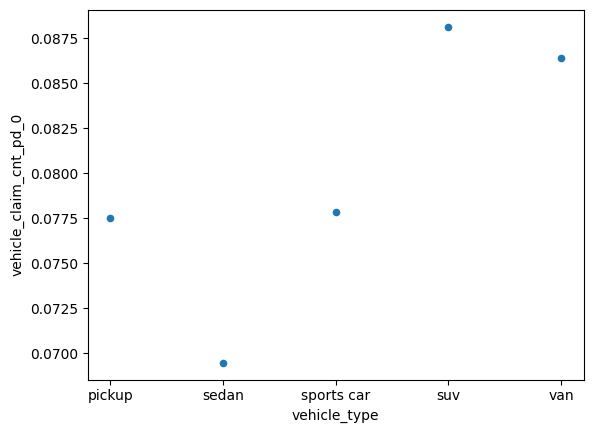


Variable: max_driver_age


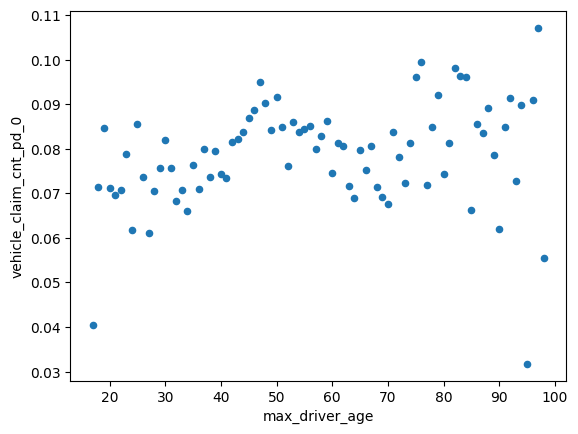


Variable: min_driver_age


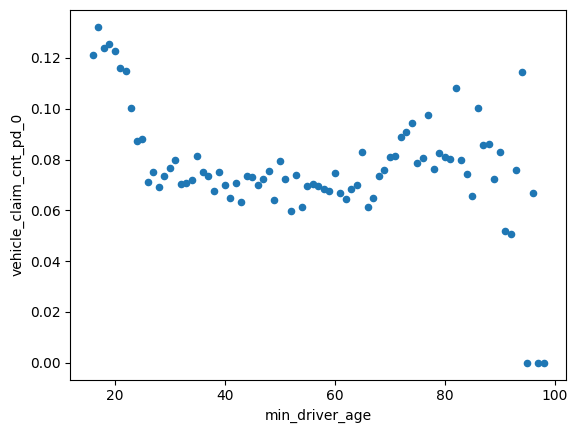


Variable: mean_driver_age


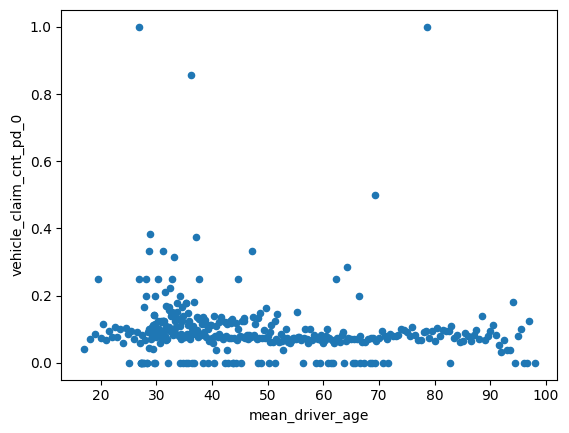


Variable: min_driver_tenure


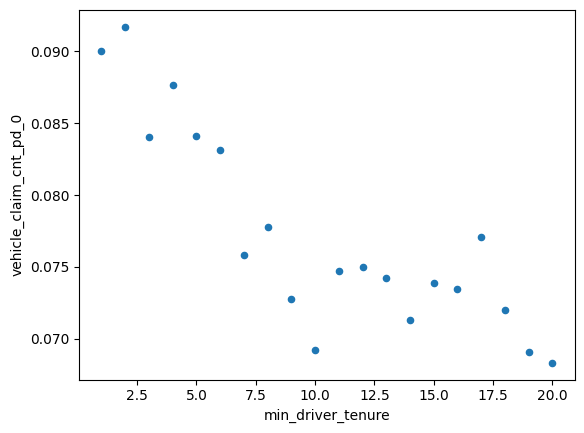


Variable: youthful_driver_count


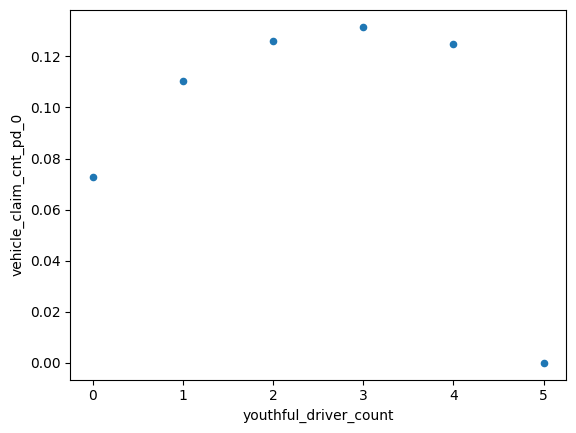


Variable: credit_score


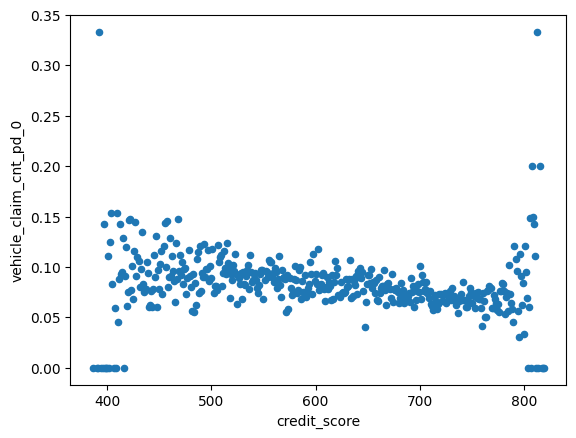


Variable: garaging_location


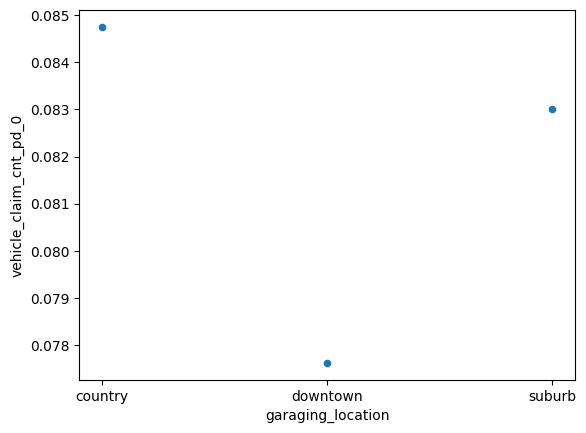


Variable: household_tenure


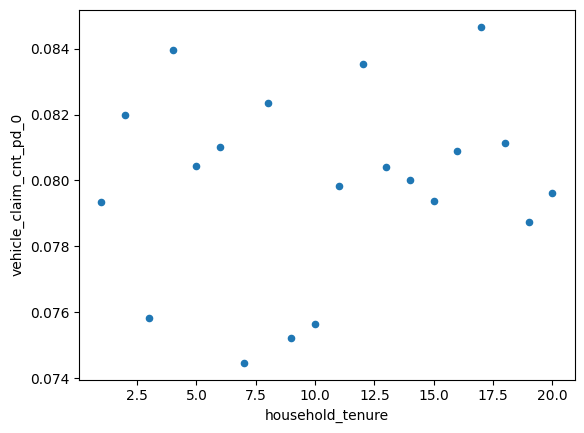


Variable: multiline_houses


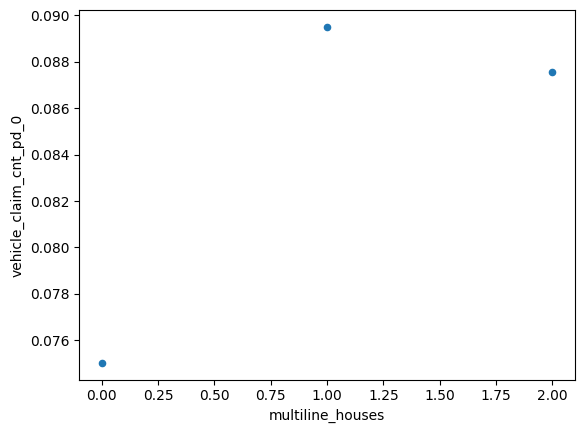


Variable: multiline_personal_article_policy


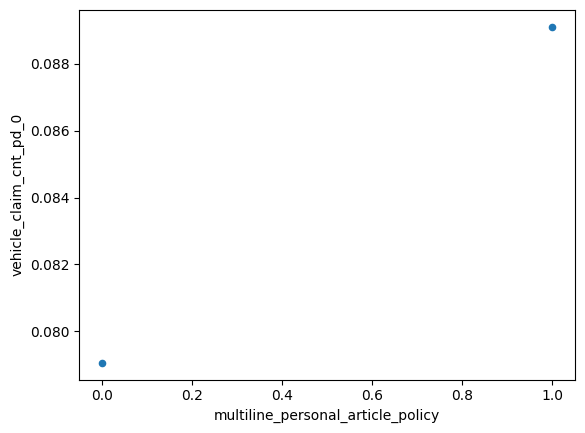


Variable: multiline_personal_liability_umbrella


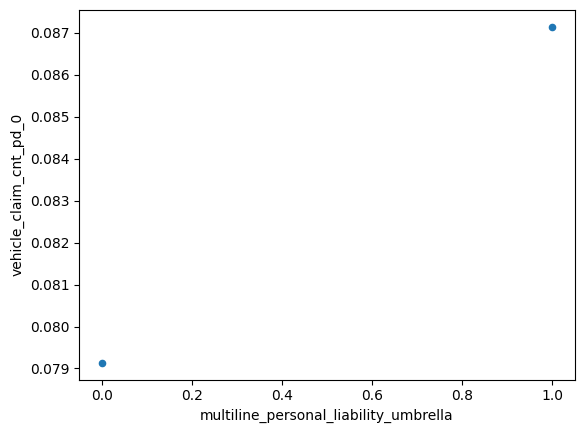


Variable: multiline_rental


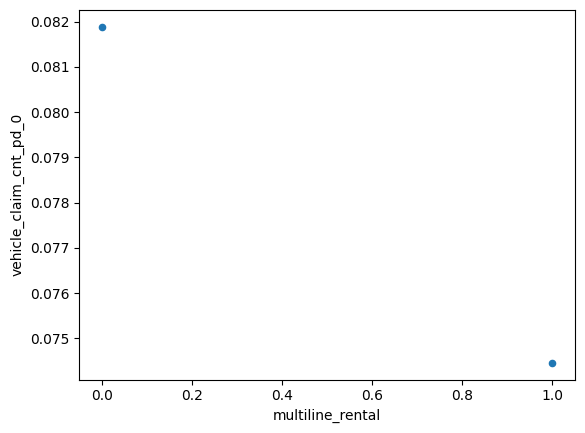


Variable: vehicle_count


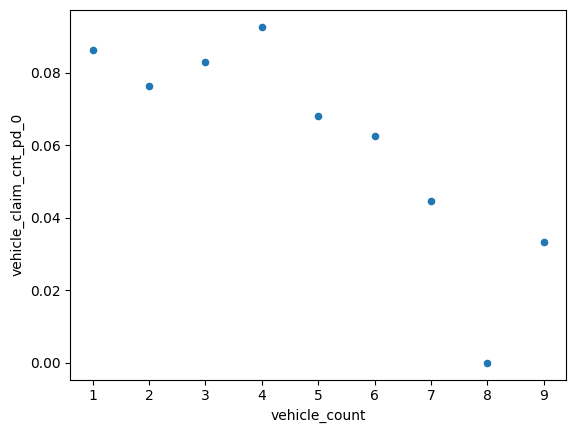


Variable: household_claim_time_since_all


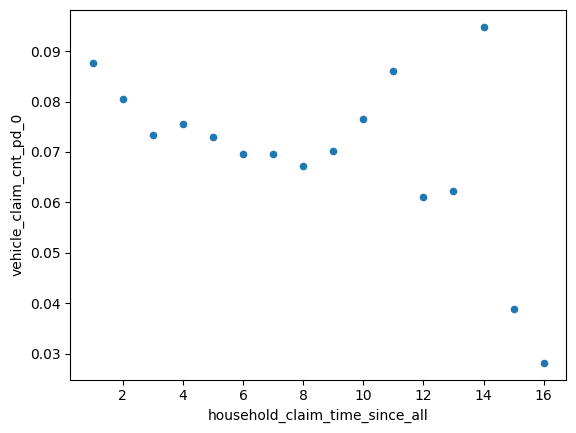


Variable: household_claim_time_since_bi


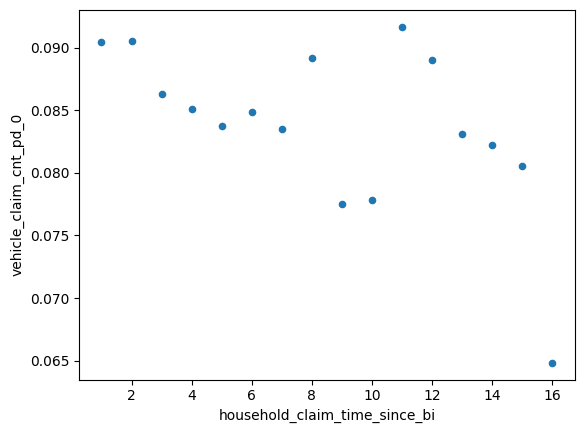


Variable: household_claim_time_since_pd


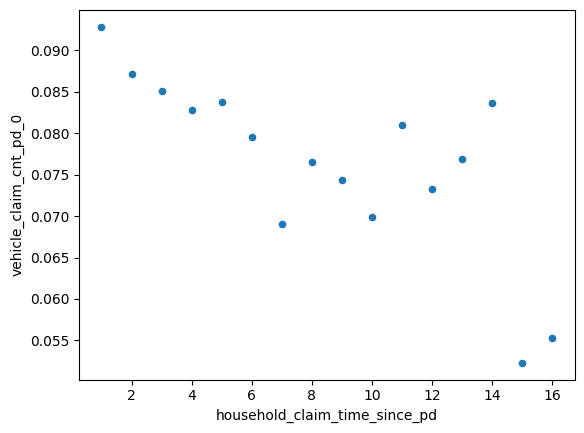


Variable: household_claim_time_since_comp


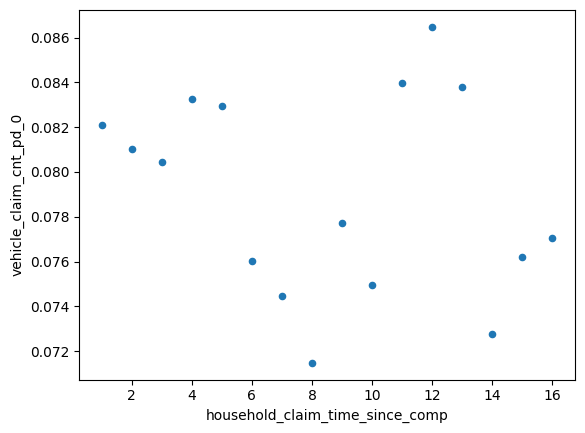


Variable: household_claim_time_since_coll


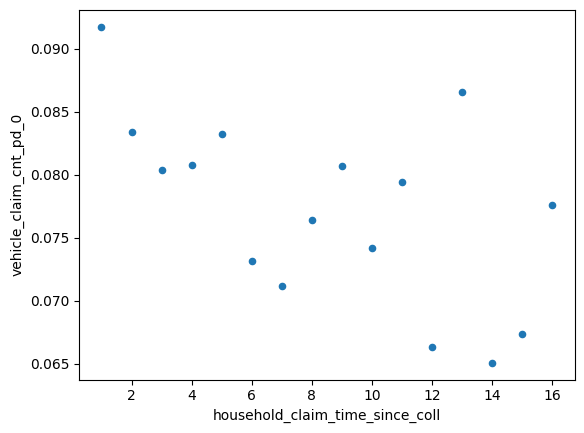


Variable: household_claim_time_since_mpc


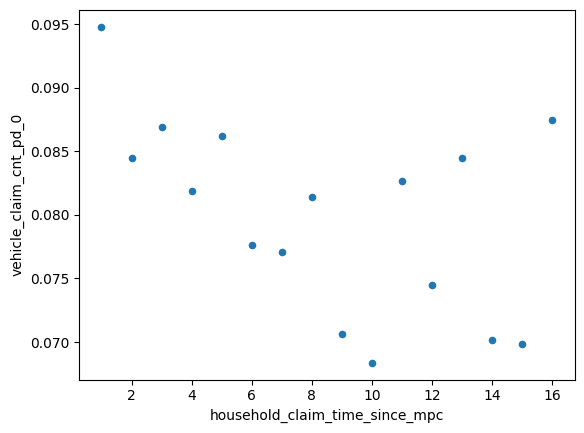


Variable: household_claim_time_since_ers


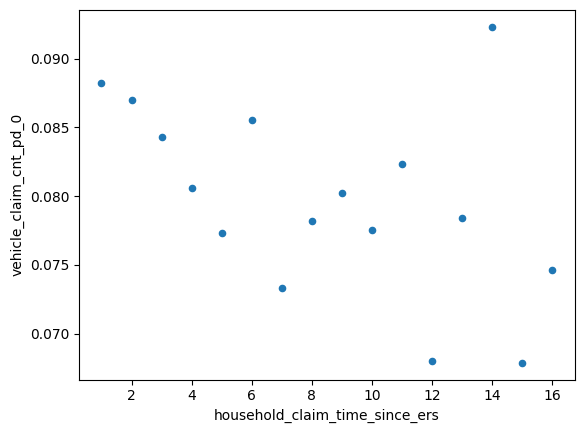


Variable: household_claim_time_since_ubi


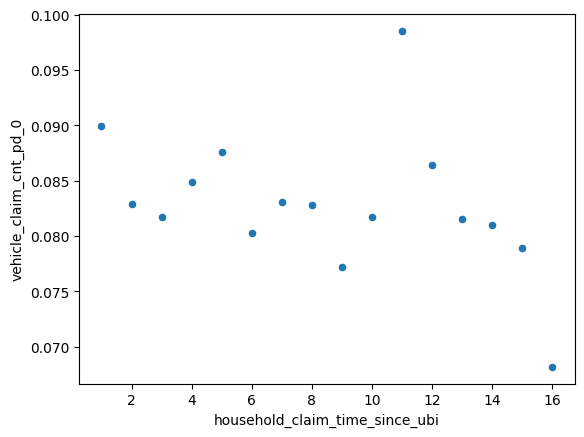

In [7]:
for target in targets:
  print(f"Target: {target}")

  for var in vars:
    print(f"\nVariable: {var}")

    df \
      .groupby(var) \
      [[target]] \
      .agg(['mean']) \
      .reset_index() \
      .plot.scatter(x = var, y = target);

    plt.pause(0.01);

garaging_location
country     Axes(0.125,0.11;0.775x0.77)
downtown    Axes(0.125,0.11;0.775x0.77)
suburb      Axes(0.125,0.11;0.775x0.77)
dtype: object

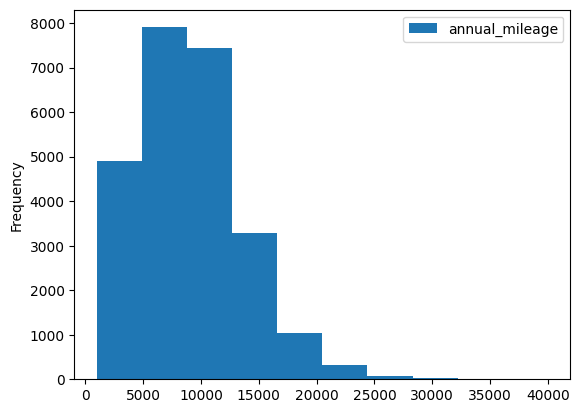

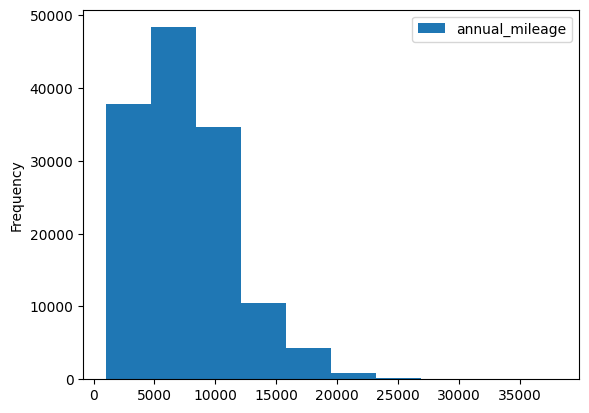

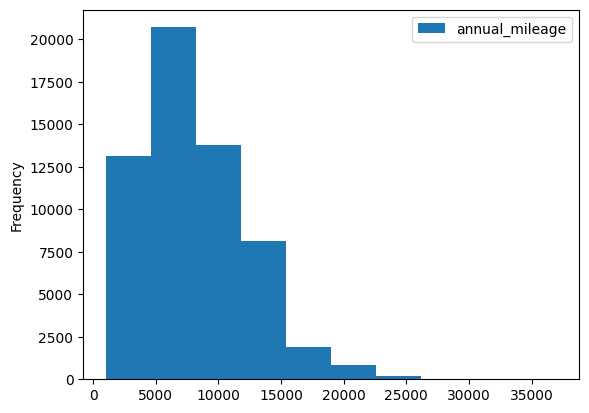

In [43]:
df \
      [['garaging_location', 'annual_mileage']] \
      .groupby(['garaging_location']) \
      .plot.hist();